In [ ]:
!python -m pip install statsmodels 

In [ ]:
!pip install pmdarima

In [29]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('NIFTY50_all.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [3]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [4]:
df.Symbol.unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [5]:
len(df.Symbol.unique())

65

In [7]:
columns = list(df.Symbol.unique())

In [12]:
data = df[df['Symbol']=="RELIANCE"]
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
166253,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
166254,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
166255,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
166256,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
166257,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171554,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
171555,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
171556,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
171557,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527


In [15]:
data.Date = pd.to_datetime(data.Date)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11688\3822779281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Date = pd.to_datetime(data.Date)


In [16]:
data.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

In [20]:
data = data[data["Date"]<"2012-1-1"]
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
169243,2011-12-26,RELIANCE,EQ,746.40,747.05,764.80,745.55,759.30,761.00,757.75,2376469,1.800775e+14,57259.0,498900.0,0.2099
169244,2011-12-27,RELIANCE,EQ,761.00,766.00,768.70,745.35,754.05,753.05,757.23,3074308,2.327961e+14,62515.0,793411.0,0.2581
169245,2011-12-28,RELIANCE,EQ,753.05,757.70,758.50,735.35,736.10,739.05,743.80,2829068,2.104268e+14,79333.0,819451.0,0.2897
169246,2011-12-29,RELIANCE,EQ,739.05,733.65,739.00,707.20,709.70,711.90,720.10,5449524,3.924181e+14,107457.0,2101882.0,0.3857
169247,2011-12-30,RELIANCE,EQ,711.90,713.00,720.55,689.00,693.10,692.95,703.06,6662330,4.684037e+14,168592.0,2317483.0,0.3478


In [21]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [13]:
data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [22]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [31]:
for name, column in data[['Close' ,'Open' ,'High','Low']].iteritems():
    Augmented_Dickey_Fuller_Test_func(data[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.515491
p-value                           0.525835
No Lags Used                     20.000000
Number of Observations Used    2974.000000
Critical Value (1%)              -3.432551
Critical Value (5%)              -2.862512
Critical Value (10%)             -2.567288
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Open
Test Statistic                   -1.626382
p-value                           0.469385
No Lags Used                     15.000000
Number of Observations Used    2979.000000
Critical Value (1%)              -3.432547
Critical Value (5%)              -2.862511
Critical Value (10%)             -2.567287
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                   -1.538791
p-value                      

In [32]:
X = data[['Close' ]]
actualtrain, actualtest = X[0:-30], X[-30:]
exoX = data[['Open' ]]
exotrain, exotest = exoX[0:-30], exoX[-30:]

In [34]:
data.shape

(2995, 15)

In [35]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
166253,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
166254,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
166255,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
166256,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
166257,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


 Fitting SARIMAX for Seasonal value m = 1
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29876.440, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29877.603, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29874.440, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29874.473, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29875.679, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=29876.434, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29874.123, Time=2.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29853.187, Time=1.88 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=29856.537, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=29855.174, Time=3.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29847.106, Time=5.51 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29845.544, Time=5.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29870.085, Time=2.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=29

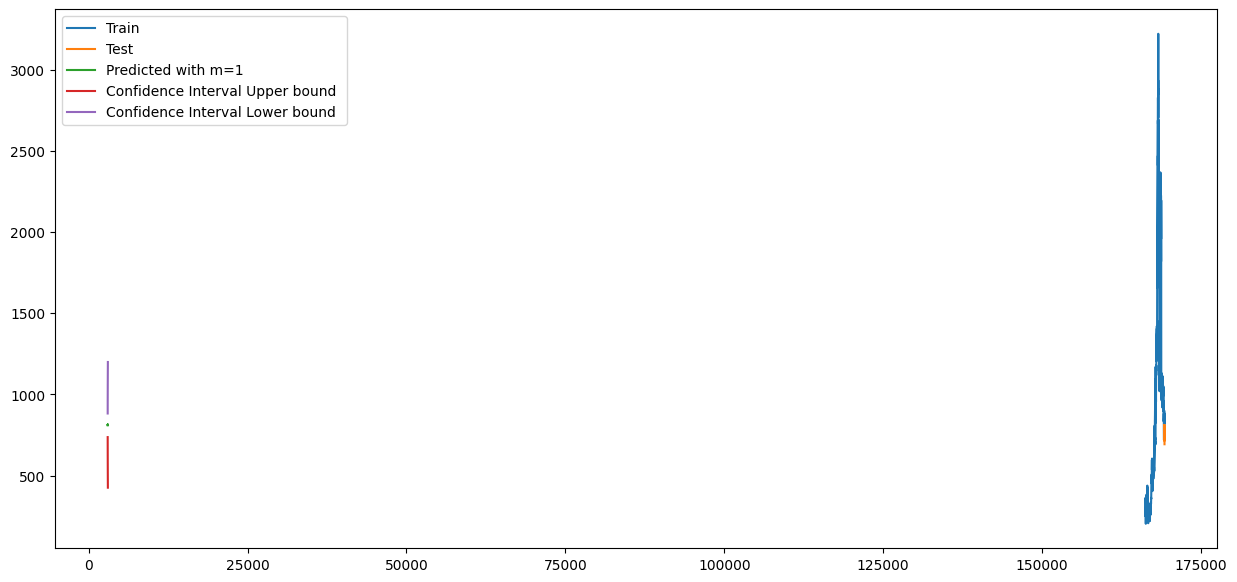

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 1


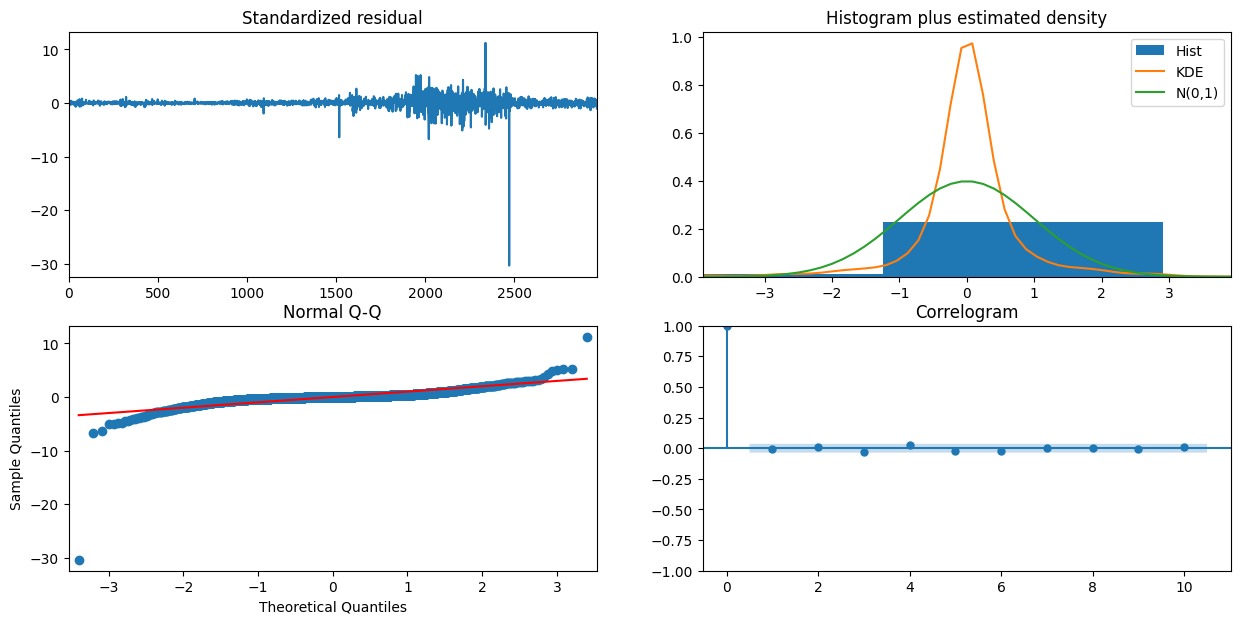

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 4
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=29868.856, Time=4.55 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=29877.603, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=29873.310, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=29873.568, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=29875.679, Time=0.15 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=29875.548, Time=2.23 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=29875.308, Time=1.89 sec
 ARIMA(1,1,1)(2,0,1)[4] intercept   : AIC=29870.734, Time=11.30 sec
 ARIMA(1,1,1)(1,0,2)[4] intercept   : AIC=29870.741, Time=10.23 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=29876.440, Time=0.79 sec
 ARIMA(1,1,1)(0,0,2)[4] intercept   : AIC=29872.592, Time=3.45 sec
 ARIMA(1,1,1)(2,0,0)[4] intercept   : AIC=29872.453, Time=3.16 sec
 ARIMA(1

In [36]:
for m in [1, 4,7,12,52]:
    print("="*100)
    print(f' Fitting SARIMAX for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(actualtrain,exogenous =exotrain ,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=True,start_P=1,start_Q=1,max_P=7,max_D=7,max_Q=7,m=m,
    d=None,D=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast,conf_int = stepwise_model.predict(n_periods=30,exogenous =exotest,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(2995, 3025)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(2995, 3025)
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(actualtest, forecast)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(actualtrain, label='Train ')
    plt.plot(actualtest, label='Test ')
    plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')
    
    display(stepwise_model.plot_diagnostics());
    print("-"*100)